# HW 1 
## Name: Guanda Jiang
## USC ID: 2837333230

### Q1.a

In [1]:
import pandas as pd
import numpy as np
df = pd.read_table('column_2c.dat',header = None,sep='\s+')
df.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 
              'sacral slope', 'pelvic radius', 'rade of spondylolisthesis','class']

### change all AB to 1, NO to 0
d = {'AB':1,'NO':0}
df['class'] = df['class'].replace(d)
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,rade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


### Q1.b.i

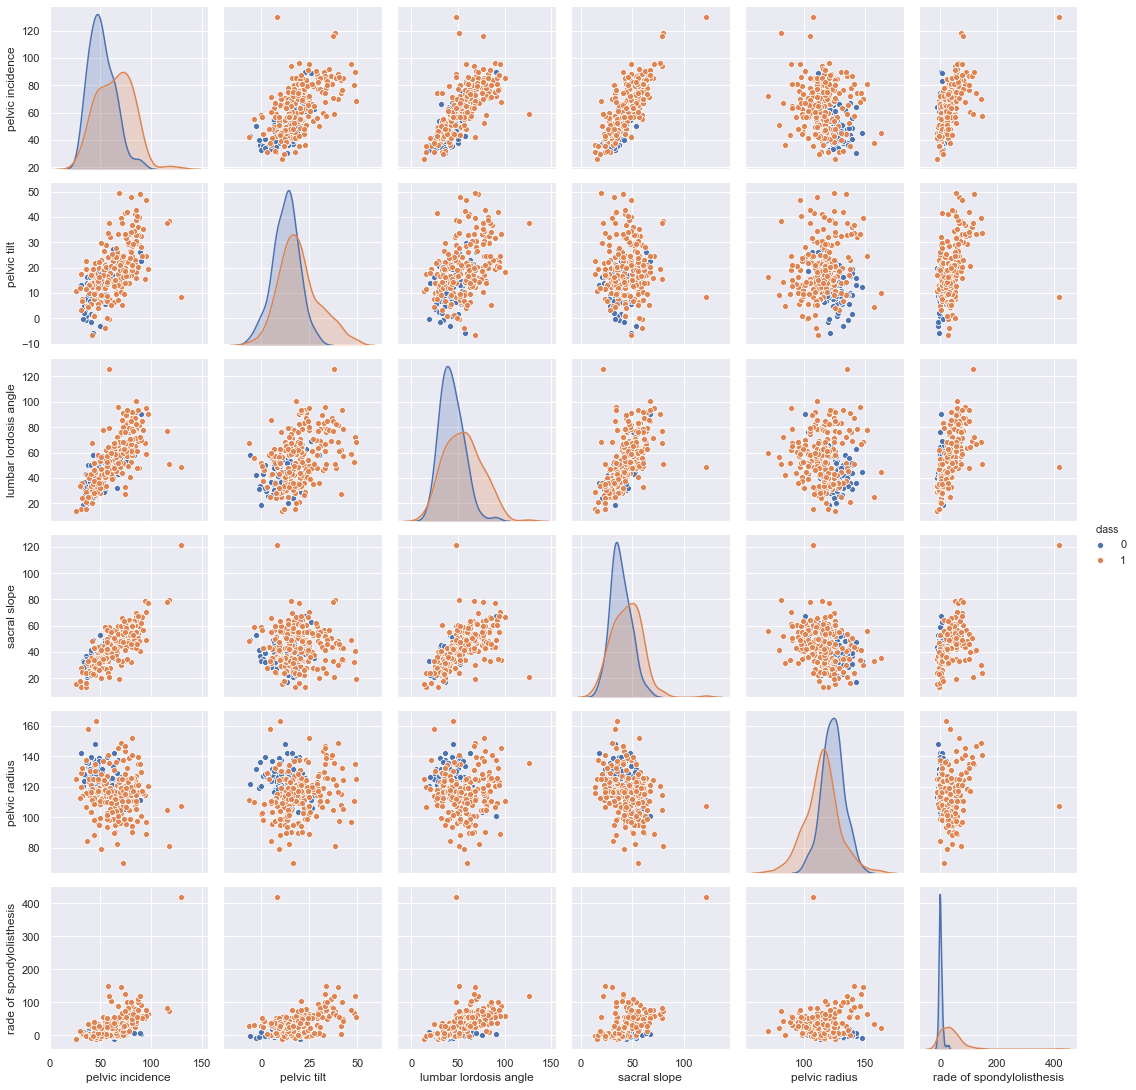

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(df,hue = 'class')


### Q1.b.ii

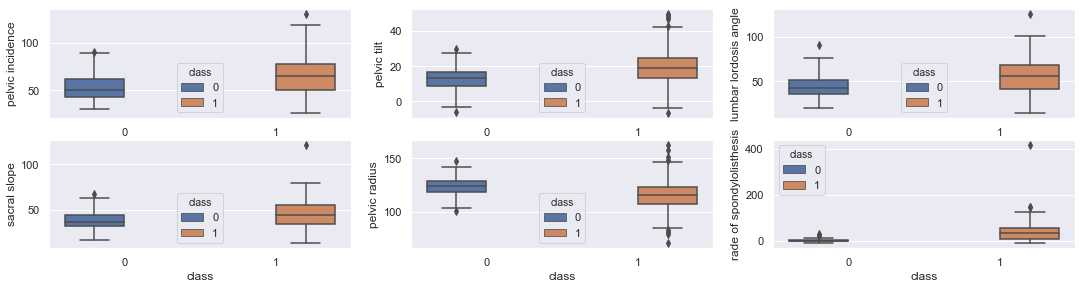

In [3]:
for i,column in zip(range (1,7),df.columns):
    plt.subplot(2,3,i)
    sns.boxplot(x='class',y=column,data=df,hue='class')
plt.subplots_adjust(right=2.5,bottom = 0.05)

### Q1.b.iii

In [4]:
AB = df[df['class']==1]
len(AB)
train1 = df.iloc[:140] ###train set for 'class'==1
train0 = df.iloc[210:280] ###train set for 'class'==0
train = pd.concat([train1,train0])
train.head()
test = df[~df.index.isin(train.index)]
test.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,rade of spondylolisthesis,class
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1


### Q1.c.i

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### Q1.c.ii

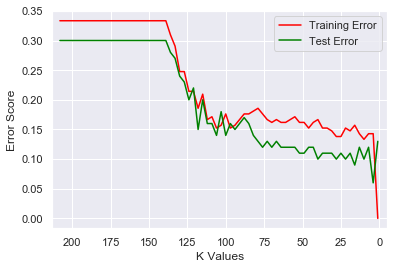

In [6]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

X_train = train.drop(columns=['class']) 
y_train = train['class']
X_test = test.drop(columns=['class']) 
y_test = test['class']
k_value = range(208, 0, -3)
trainerror = []
testerror = []

for i in k_value:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)
    trainerror.append(1 - accuracy_score(y_train,train_predict))
    testerror.append(1 - accuracy_score(y_test,test_predict))

# plot train error and test error
plt.plot(k_value,trainerror,color='red',label='Training Error')
plt.plot(k_value,testerror,color='green',label='Test Error')
plt.xlim((213, -5))
plt.xlabel('K Values')
plt.ylabel('Error Score')
plt.legend()


**find the best k***

In [7]:
k_testerror = {}
for i,j in zip(k_value,testerror):
    k_testerror[i]=j   
optimal_k = min(k_testerror,key=k_testerror.get)
print(optimal_k)  # k* = 4

4


**Cal-culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score**

In [8]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)

from sklearn import metrics

# confusion matrix
cm = metrics.confusion_matrix(y_test,y_predict)
print(cm) #[[25  5]
          #[ 1 69]]
    
# tp rate,tn rate,precision
tn,fp,fn,tp = metrics.confusion_matrix(y_test,y_predict).ravel()
tp_rate = tp/(tp+fn)
tn_rate = tn/(tn+fp)
print(tp_rate,tn_rate)    # tp_rate=0.9857142857142858  tn_rate=0.8333333333333334
precision = metrics.precision_score(y_test,y_predict)
print(precision)     # precison=0.9324324324324325
f1_score = metrics.f1_score(y_test,y_predict)
print(f1_score)     # f1 score = 0.9583333333333333

[[25  5]
 [ 1 69]]
0.9857142857142858 0.8333333333333334
0.9324324324324325
0.9583333333333333


### Q1.c.iii

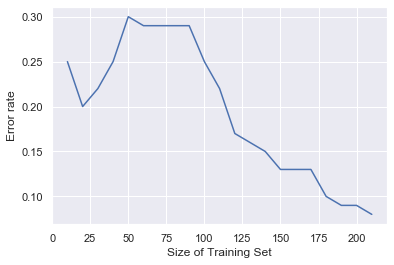

In [9]:
N = range(10,211,10)
best_error = []
for n in range(10,211,10):
    new_train = pd.concat([train1.iloc[0:(n - int(n/3))],train0.iloc[0:(int(n/3))]])
    X_new_train = new_train.drop(columns=['class'])
    y_new_train = new_train['class']
    new_testerror = []
    for k in range(1,n,5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_new_train,y_new_train)
        new_test_predict = knn.predict(X_test)
        new_testerror.append(1 - accuracy_score(y_test,new_test_predict))
    min_error = np.min(new_testerror)
    best_error.append(min_error)
plt.plot(N,best_error)
plt.xlabel('Size of Training Set')
plt.ylabel('Error rate')
plt.show()

### Q1.d.i.A

In [10]:
new_k = range(1,197,5)
man_testerror = []  # list of test error using Manhattan Distance

for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan',p=1)
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    man_testerror.append(1 - accuracy_score(y_test,test_predict))
result = (dict(zip(new_k,man_testerror)))
min_keys = [i for i, j in result.items() if not any(k < j for k in result.values())]
print(min_keys)

[6, 11, 26]


**When k = 6,11,26, they have the same minimum test error rate.
So, let's calculate their f1 score to see if we can choose the best k***

In [11]:
k_sub = (6,11,26)
f1 = []
for i in k_sub:
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'manhattan',p=1)
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    f1_score = metrics.f1_score(y_test,test_predict)
    f1.append(f1_score)
result1 = (dict(zip(k_sub,f1)))
max_keys = [i for i, j in result1.items() if not any(k > j for k in result1.values())]
print(max_keys)

[11, 26]


**Since both of them have the same f1 score, let's choose the samller one. k* = 11**

In [12]:
Manhattan = dict({'Manhattan':[11,result[11]]})
print(Manhattan)

{'Manhattan': [11, 0.10999999999999999]}


### Q1.d.i.B
*if log10(p)=0.1, p = 10^0.1*

In [14]:
import math
p_value = [pow(10,0.1*i) for i in range(1,11)]
log10_p = []

# we choose k = 11 from Manhattan distance
log_testerror = []
for p in p_value:
    knn = KNeighborsClassifier(n_neighbors=11,p=p)
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    log_testerror.append(1 - accuracy_score(y_test,test_predict))
    log10_p.append(math.log10(p))
result_log = dict(zip(log10_p,log_testerror))
min_keys = [i for i, j in result_log.items() if not any(k < j for k in result_log.values())]
print(min_keys)

[0.10000000000000002, 0.20000000000000004, 0.8, 0.9, 1.0]


**When log10(p)=0.1, 0.2, 0.8, 0.9, 1, they have same minimum test error rate. 
So, let's use f1 score to see if we can find the best one**

In [14]:
new_log10_p = min_keys
new_p = [pow(10,0.1*i) for i in (1,2,8,9,10)]
f1_log = []
for p in new_p:
    knn = KNeighborsClassifier(n_neighbors=11,p=p)
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    f1_score = metrics.f1_score(y_test,test_predict)
    f1_log.append(f1_score)
log_f1 = (dict(zip(new_log10_p,f1_log)))
max_keys = [i for i, j in log_f1.items() if not any(k > j for k in log_f1.values())]
print(max_keys)

[0.20000000000000004, 0.8, 0.9, 1.0]


**When log10(p)=0.2, 0.8, 0.9, 1, they have same f1_score. 
So, let's choose the smallest one, log10(p)=0.2**

In [15]:
print(result_log[0.20000000000000004])  # the error rate is 0.1099999999999

0.10999999999999999


**Therefore, when log10(p)=0.2, the minimum test error rate is 0.109999999999**

### Q1.d.i.C

In [16]:
che_testerror = []
for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'chebyshev')
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    che_testerror.append(1 - accuracy_score(y_test,test_predict))
result3 = (dict(zip(new_k,che_testerror)))
min_keys = [i for i, j in result3.items() if not any(k < j for k in result3.values())]
print(min_keys)

# When k = 16, the minimum test error using Chebyshev Distance is
Chebyshev = dict({'Chebyshev':[16,result3[16]]})
print(Chebyshev)

[16]
{'Chebyshev': [16, 0.07999999999999996]}


### Q1.d.ii

In [17]:
mah_testerror = []
for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i,
                               metric = 'mahalanobis',
                               metric_params = {'V':np.cov(X_train.values,rowvar = False)})
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    mah_testerror.append(1 - accuracy_score(y_test,test_predict))
result4 = (dict(zip(new_k,mah_testerror)))
min_keys = [i for i, j in result4.items() if not any(k < j for k in result4.values())]
print(min_keys)

[1, 6]


**When k = 1,6, we get the same minimum test error rate.
So, let's check their f1_score to see if there is the best one**

In [18]:
k_star= (1,6)
f1 = []
for i in k_star:
    knn = KNeighborsClassifier(n_neighbors=i,
                               metric = 'mahalanobis',
                               metric_params = {'V':np.cov(X_train.values,rowvar = False)})
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    f1_score = metrics.f1_score(y_test,test_predict)
    f1.append(f1_score)
result5 = (dict(zip(k_star,f1)))
max_keys = [i for i, j in result5.items() if not any(k > j for k in result5.values())]
print(max_keys)

# When k = 1, we get better f1 score, so let choose k = 1, as k*
Mahalanobis = dict({'Mahalanobis':[1,result4[1]]})
print(Mahalanobis)

[1]
{'Mahalanobis': [1, 0.17000000000000004]}


In [19]:
# Summary Table for k* and Minimum Test Error Rate with Different Methods
Manhattan.update(Chebyshev)    # Merge Manhattan dict and Chebyshev dict
Manhattan.update(Mahalanobis)     # Merge updated Manhattan dict with Mahalanobis dict
Summary = Manhattan
table = pd.DataFrame(Summary,
                     index=['k*','Test Error Rate'])
print(table)

                 Manhattan  Chebyshev  Mahalanobis
k*                   11.00      16.00         1.00
Test Error Rate       0.11       0.08         0.17


### Q1.e
**Euclidean Distance**

In [20]:
new_k = range(1,197,5)
euc_test_err = []

for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    euc_test_err.append(1 - accuracy_score(y_test,test_predict))
euc_result = (dict(zip(new_k,euc_test_err)))
min_keys = [i for i, j in euc_result.items() if not any(k < j for k in euc_result.values())]
print(min_keys)

# When k = 6, we get the minimun test error rate, so let choose k* = 6
Euclidean = dict({'Euclidean':[6,euc_result[6]]})
print(Euclidean)

[6]
{'Euclidean': [6, 0.09999999999999998]}


**Manhattan Distance**

In [21]:
man_test_err = []
for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', p=1, weights = 'distance')
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    man_test_err.append(1 - accuracy_score(y_test,test_predict))
man_result = (dict(zip(new_k,man_test_err)))
min_keys = [i for i, j in man_result.items() if not any(k < j for k in man_result.values())]
print(min_keys)

# When k = 26, we get the minimun test error rate, so let choose k* = 26
Manhattan = dict({'Manhattan':[26,euc_result[26]]})
print(Manhattan)

[26]
{'Manhattan': [26, 0.10999999999999999]}


**Chebyshev Distance**

In [22]:
che_test_err = []
for i in new_k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev', weights = 'distance')
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    che_test_err.append(1 - accuracy_score(y_test,test_predict))
che_result = (dict(zip(new_k,che_test_err)))
min_keys = [i for i, j in che_result.items() if not any(k < j for k in che_result.values())]
print(min_keys)

[16, 31, 36, 41, 61]


**When k = 16,31,36,41,61, they have the same minimum test error rate.
So, let's use f1_score to see if we can choose the best one**

In [23]:
k_choice= (16,31,36,41,61)
f1 = []
for i in k_choice:
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'chebyshev', weights = 'distance')
    knn.fit(X_train,y_train)
    test_predict = knn.predict(X_test)
    f1_score = metrics.f1_score(y_test,test_predict)
    f1.append(f1_score)
che_result1 = (dict(zip(k_choice,f1)))
max_keys = [i for i, j in che_result1.items() if not any(k > j for k in che_result1.values())]
print(max_keys)
# When k = 16, we get the highest f1 score
# So, let choose k = 16 as k*
Chebyshev = dict({'Chebyshev':[16,che_result[16]]})
print(Chebyshev)

[16]
{'Chebyshev': [16, 0.10999999999999999]}


### Q1.f
*The lowest training error rate I acheived in this homework is 0,when k=1*
